<h1>
    <center>
        <font color = blue >
            Credit EDA Case Study
        </font>    
            </center>
</h1>
<p style="text-align:right">
                           Submitted by Amrita Chatterjee and Padma A
</p>

<h2 style="font-family: Cambria>
    <font color = green>
       0. Import necessary libraries
    </font>  
</h2>    

<h2>
    <font color = green>
        0. Import necessary libraries
    </font>
</h2>    

### 0.1 Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

### 0.2 Suppressing Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 0.3 Adjusting viewing mode in Jupyter

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<h2>
    <font color = green>
        1. Import Data Sources from CSV files
    </font>
</h2> 


### 1.1 Importing the application_data csv file as applicationDF

In [4]:
applicationDF = pd.read_csv("application_data.csv")

### 1.2 Importing the previous_application csv file as previdousDF

In [5]:
previousDF= pd.read_csv("previous_application.csv")

<h2>
    <font color = green>
        2. Inspect the dataframes and respective columns for data understanding
    </font>
</h2> 


### 2.1 Inspect applicationDF Dataframe

In [ ]:
# Checking the top 5 rows of the dataframe
applicationDF.head()

In [ ]:
# checking botton 5 rows of the dataframe
applicationDF.tail()

In [ ]:
# Checking the shape of the dataframe
applicationDF.shape

In [ ]:
# Checking the size of the dataframe
applicationDF.size

#### Initial investigation of application_data dataframe by checking info() for Index, Datatype and Memory information

In [6]:
# checking the info about column type etc.
applicationDF.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [ ]:
# How many types of each data type column exists and total memory usage
applicationDF.info()

In [ ]:
# Checking the numerical columns data distribution
applicationDF.describe()

### 2.2 Inspect previousDF Dataframe

In [ ]:
# Checking the top 5 rows of the dataframe
previousDF.head()

In [ ]:
# checking botton 5 rows of the dataframe
previousDF.tail()

In [ ]:
# Checking the shape of the dataframe
previousDF.shape

In [ ]:
# Checking the size of the dataframe
previousDF.size

#### Initial investigation of previous_data dataframe by checking info() for Index, Datatype and Memory information

In [ ]:
# checking the info about column type etc.
previousDF.info(verbose = True)

In [ ]:
# How many types of each data type column exists and total memory usage
previousDF.info()

In [ ]:
# Checking the numerical columns data distribution
previousDF.describe()

<h2>
    <font color = green>
        3. Data Cleaning & Manipulation
    </font>
</h2> 


### 3.1 Column data type conversion

### Changing the column types of applicationDF dataframe

#### Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.
3.1.1 Numeric column conversion from object to Numeric

In [ ]:
# # Converting the numeric values in applicationDF dataframe
# numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
#                 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
#        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

# applicationDF[numeric_columns]=applicationDF[numeric_columns].apply(pd.to_numeric)


In [ ]:
# # checking the dataframe after conversion
# applicationDF.info(verbose=True)

#### 3.1.2 Converting Y/N flag columns to 1/0 int64 format

In [6]:
Flag_col_application =['FLAG_OWN_CAR','FLAG_OWN_REALTY']

for col in Flag_col_application:
    applicationDF[col].replace(('Y', 'N'), (1, 0), inplace=True)


In [7]:
applicationDF['EMERGENCYSTATE_MODE'].replace(("Yes","No"),(1,0),inplace=True)

In [9]:
# rechecking the dataframe after column conversion
applicationDF.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  int64  
 5   FLAG_OWN_REALTY               int64  
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

#### 3.1.3 Date column conversion from object to Categorical column

In [8]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                  'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',
                  'HOUSETYPE_MODE','FONDKAPREMONT_MODE','WALLSMATERIAL_MODE']
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [11]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(13), float64(66), int64(43)
memory usage: 259.5 MB


In [12]:
# rechecking the dataframe after column conversion
applicationDF.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE            category
 3   CODE_GENDER                   category
 4   FLAG_OWN_CAR                  int64   
 5   FLAG_OWN_REALTY               int64   
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT                    float64 
 9   AMT_ANNUITY                   float64 
 10  AMT_GOODS_PRICE               float64 
 11  NAME_TYPE_SUITE               category
 12  NAME_INCOME_TYPE              category
 13  NAME_EDUCATION_TYPE           category
 14  NAME_FAMILY_STATUS            category
 15  NAME_HOUSING_TYPE             category
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  DAY


### Changing the column types of previousDF dataframe


#### 3.1.4 converting Yes/No or Y/N columns to 1/0 format

In [9]:
Flag_col_previous =['FLAG_LAST_APPL_PER_CONTRACT']
previousDF['FLAG_LAST_APPL_PER_CONTRACT'].replace(('Y', 'N'), (1, 0), inplace=True)

#### 3.1.5 converting Catgoerical columns from object to categorical

In [10]:
Catgorical_col_p = ['WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [15]:
# inspecting the column types after conversion
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  object  
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_DOWN_PAYMENT             774370 non-null   float64 
 7   AMT_GOODS_PRICE              1284699 non-null  float64 
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  int64   
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 12  RATE_DOWN_PAYMENT           

### 3.2 Null Value calculation

#### 3.2.1 Null value analysis for applicationDF dataframe

#### Get the percentage of null values in each column

In [16]:
# Checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### Get the columns in which percentage of null values > 40% and Plot the columns vs Null Values Present in it:

In [11]:
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
null_applicationDF

,Column Name,Null Values Percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


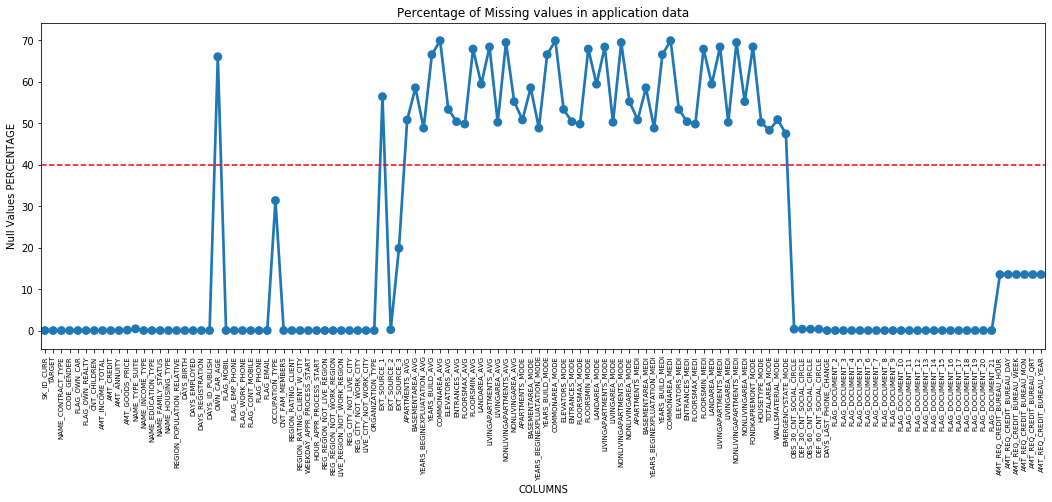

In [12]:
# plotting the null value % in a line graph for visualizing. 
# Set a limit of 40% target line to check which columns have more than 40% unknown values
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF)
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [13]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [25]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

#### 3.2.2 Null value analysis for previousDF dataframe

#### Get the percentage of null values in each column

In [ ]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

#### Get the columns in which percentage of null values > 40% and Plot the columns vs Null Values Present in it:

In [14]:
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
null_previousDF

,Column Name,Null Values Percentage
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


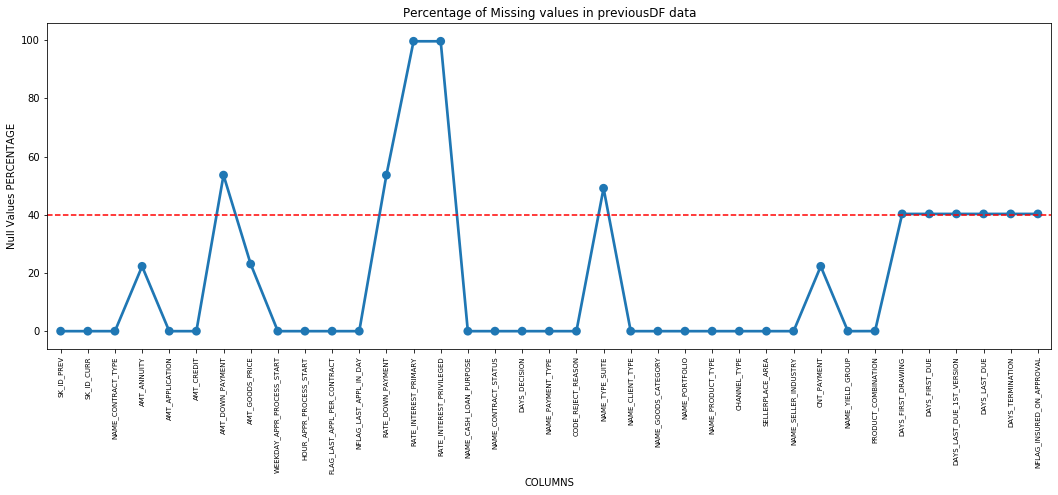

In [15]:
# plotting the null value % in a line graph for visualizing. 
# Set a limit of 40% target line to check which columns have more than 40% unknown values
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_previousDF)
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in previousDF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [16]:
# more than or equal to 40% empty rows columns
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [30]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_previous)

11

<p>
    <font color = blue>
        <em>
There are 49 columns in applicationDF and 11 columns in previousDF which have null values 40% or more. These columns can be deleted from the analysis.
Before dropping these columns, we want to investigate if there are more columns that can be dropped from the two dataframes.        </em>
    </font>
</p>    

### 3.3 Analyze & Delete Unnecessary Columns

#### 3.3.1 Analyze if there are other unwanted columns in applicationDF

Due to [an issue in matplotlib version 3.1.1](https://gitter.im/matplotlib/matplotlib?at=5d239514f5dd1457424d7b09), [sns.heatmap top and bottom boxes are cut off](https://github.com/mwaskom/seaborn/issues/1773), we have used set_ylim(bottom + 0.5, top - 0.5) as a [workaround](https://github.com/matplotlib/matplotlib/issues/14751) to display the heatmap properly. If the heatmap is not seen properly at the TA's side, please comment the line out.

#### Investigating if there is any correlation between EXT_SOURCE_X columns and loan repayment status

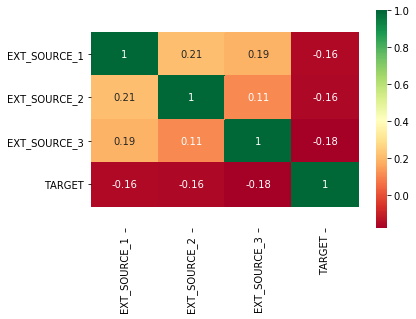

In [17]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5); 

<p>
    <font color = blue>
        <em>
As there is no correlation among EXT_SOURCE_X columns and targets, we can drop these columns
        </em>
    </font>
</p>  

In [18]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

51

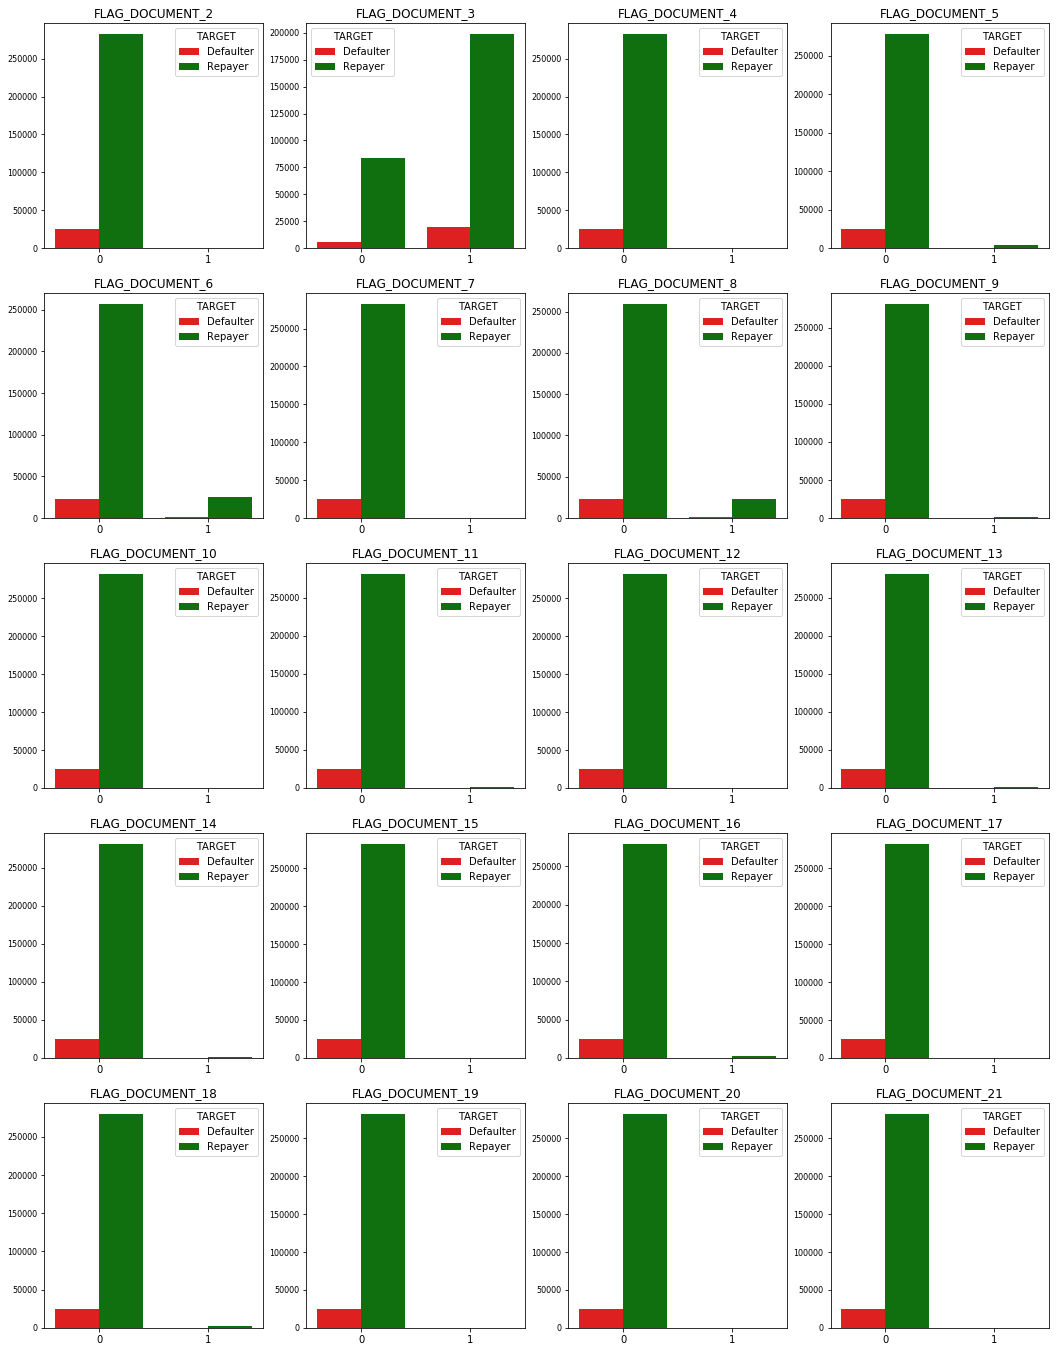

In [19]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = applicationDF[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(18,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

<p>
    <font color = blue>
        <em>
The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan
        </em>
    </font>
</p> 

In [20]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

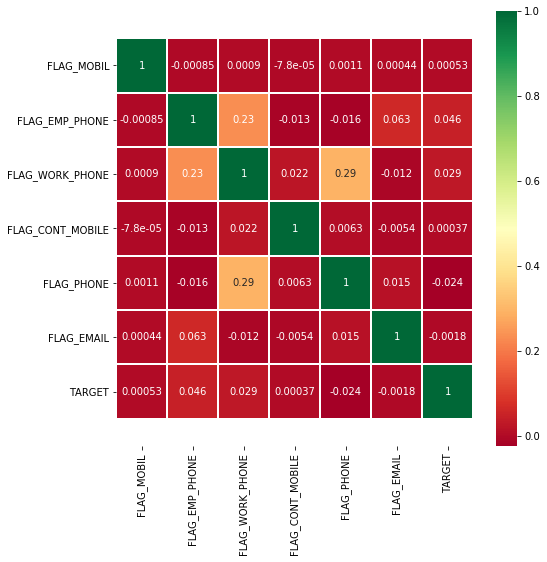

In [21]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

<p>
    <font color = blue>
        <em>
There is no correlation with flags of mobile phone, email etc with loan repayment; thus these columns can be deleted
        </em>
    </font>
</p> 

In [22]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

<p>
    <font color = blue>
        <em><b>
Total 76 columns can be deleted from applicationDF
            </b>
        </em>
    </font>
</p>

In [23]:
# Dropping the unnecessary columns from applicationDF
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)


In [24]:
# Inspecting the dataframe after removal of unnecessary columns
applicationDF.shape

(307511, 46)

In [39]:
# inspecting the column types after removal of unnecessary columns
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

<p>
    <font color = blue>
        <em><b>
After deleting unnecessary columns, there are 46 columns remaining in applicationDF
            </em></b>
    </font>
</p> 

#### 3.3.1 Analyze if there are other unwanted columns in previousDF

In [25]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [26]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [27]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

<p>
    <font color = blue>
        <em><b>
Total 15 columns can be deleted from previousDF
            </em></b>
    </font>
</p>

In [28]:
# Dropping the unnecessary columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)

In [29]:
# Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

(1670214, 22)

In [45]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  object  
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

<p>
    <font color = blue>
        <em><b>
After deleting unnecessary columns, there are 22 columns remaining in applicationDF
            </em></b>
    </font>
</p> 

### 3.4 Null value data imputation

#### 3.4.1 Impute null Values in applicationDF:


#### Strategies used:

- To impute null values in __categorical variables__ which has __lower null percentage__, mode() is used to impute the most frequent items.
- To impute null values in __categorical variables__ which has __higher null percentage__, a new category is created.
- To impute null values in __numerical variables__ which has __lower null percentage__, median() is used as 
  - There are no outliers in the columns.
  - mean returned decimal values and median returned whole numbers and the columns were number of requests.

In [46]:
# checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

#### Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:

In [55]:
applicationDF['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [30]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

#### Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:

In [31]:
applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

#### Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

In [61]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [32]:
# Impute with median as mean has decimals and this is number of people.
applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_MON'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace = True)
applicationDF['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(applicationDF['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace = True)

In [33]:
# checking the null value % of each column in previousDF dataframe
round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

<p>
    <font color = blue>
        <em><b>
We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.            </em></b>
    </font>
</p> 

#### 3.4.2 Impute Null Values in previousDF:


#### Strategies used:

- To impute null values in __continuous variables__, we plotted the distribution of the columns and used 
  - median if the distribution is skewed.
  - mode if the distribution pattern is preserved.
- To impute null values in __numerical column__, we analysed the loan status and assigned values.

In [64]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

#### Impute AMT_ANNUITY with median as the distribution is greatly skewed:

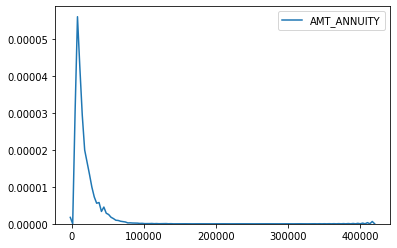

In [34]:
sns.kdeplot(previousDF['AMT_ANNUITY']);

In [35]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace = True)

#### Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:

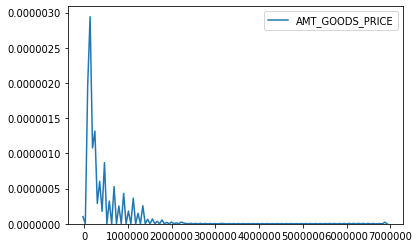

In [36]:
sns.kdeplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);

There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.

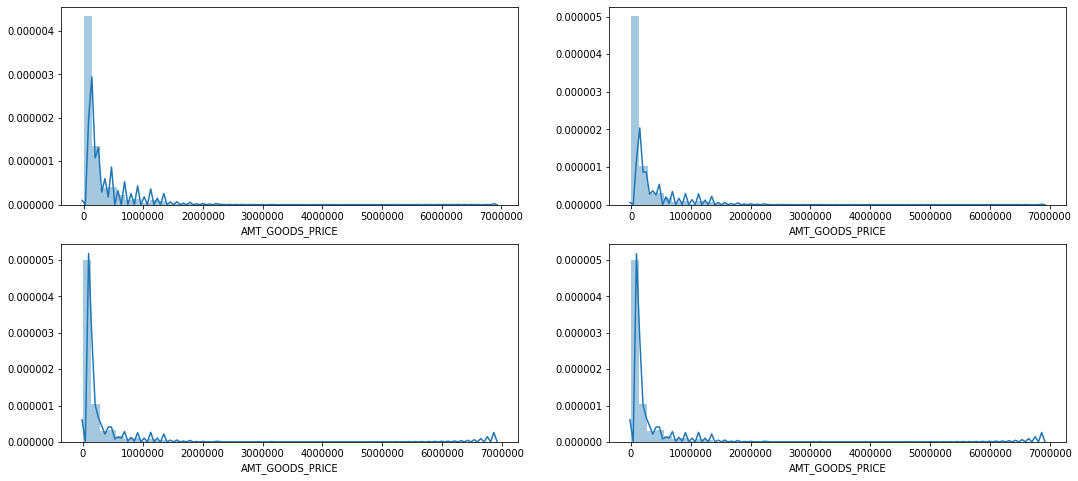

In [51]:
mode_prevDF['AMT_GOODS_PRICE_mode'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0])
median_prevDF['AMT_GOODS_PRICE_median'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
mean_prevDF['AMT_GOODS_PRICE_mean'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);
plt.subplot(222)
sns.distplot(mode_prevDF['AMT_GOODS_PRICE_mode']);
plt.subplot(223)
sns.distplot(median_prevDF['AMT_GOODS_PRICE_median']);
plt.subplot(224)
sns.distplot(mean_prevDF['AMT_GOODS_PRICE_mean']);

<p>
    <font color = blue>
        <em><b>
The original distribution closer with data imputed with mode in this case            </em></b>
    </font>
</p> 

In [55]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

#### Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [52]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [53]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [56]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
dtype: float64

<p>
    <font color = blue>
        <em><b>
We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.            </em></b>
    </font>
</p> 

### 3.5 Identifying the outliers

In [69]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

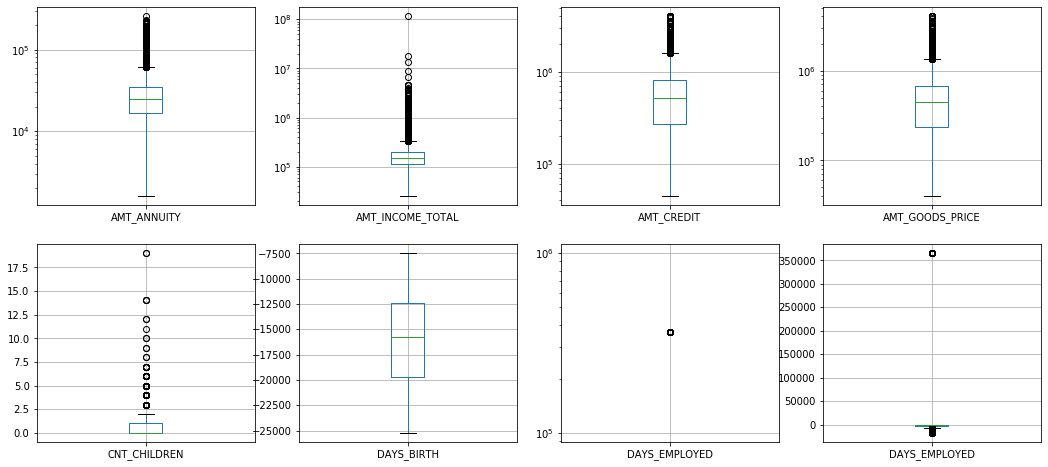

In [76]:
plt.figure(figsize=(18,8))
plt.subplot(241)
applicationDF.boxplot('AMT_ANNUITY')
plt.yscale('log')
plt.subplot(242)
applicationDF.boxplot('AMT_INCOME_TOTAL')
plt.yscale('log')
plt.subplot(243)
applicationDF.boxplot('AMT_CREDIT')
plt.yscale('log')
plt.subplot(244)
applicationDF.boxplot('AMT_GOODS_PRICE')
plt.yscale('log')
plt.subplot(245)
applicationDF.boxplot('CNT_CHILDREN')
plt.subplot(246)
applicationDF.boxplot('DAYS_BIRTH')
plt.subplot(247)
applicationDF.boxplot('DAYS_EMPLOYED')
plt.yscale('log')
plt.subplot(248)
applicationDF.boxplot('DAYS_EMPLOYED')
plt.show()

<p>
    <font color = blue>
        <em>
            It can be seen that in <b>current application data</b><br>

1. AMT_ANNUITY, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have huge number of outliers.<br>
2. CNT_CHILDREN has some outliers.<br>
3. DAYS_BIRTH has no outliers but the number of days is in negative which will be standardised in the later sections.
4. DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.
</em>
</font>
</p> 

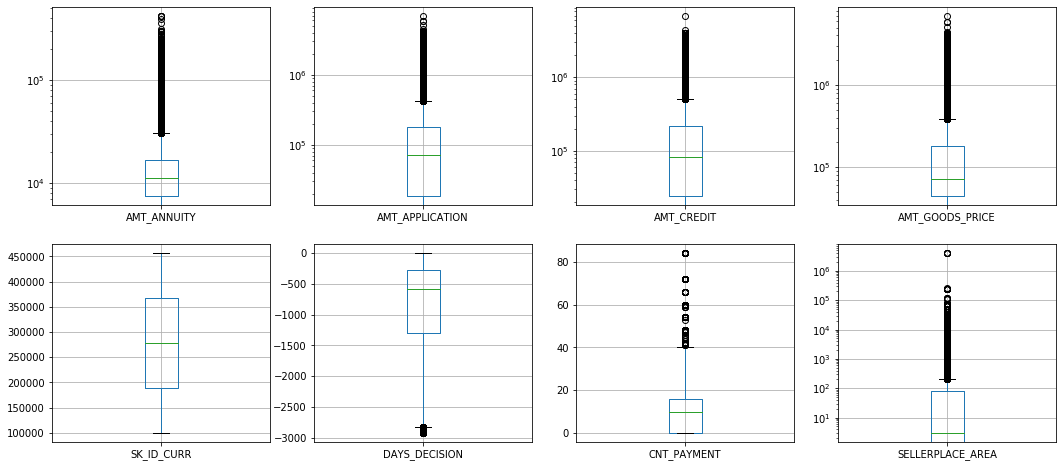

In [67]:
plt.figure(figsize=(18,8))
plt.subplot(241)
previousDF.boxplot('AMT_ANNUITY')
plt.yscale('log')
plt.subplot(242)
previousDF.boxplot('AMT_APPLICATION')
plt.yscale('log')
plt.subplot(243)
previousDF.boxplot('AMT_CREDIT')
plt.yscale('log')
plt.subplot(244)
previousDF.boxplot('AMT_GOODS_PRICE')
plt.yscale('log')
plt.subplot(245)
previousDF.boxplot('SK_ID_CURR')
plt.subplot(246)
previousDF.boxplot('DAYS_DECISION')
plt.subplot(247)
previousDF.boxplot('CNT_PAYMENT')
plt.subplot(248)
previousDF.boxplot('SELLERPLACE_AREA')
plt.yscale('log')
plt.show()

<p>
    <font color = blue>
        <em>
            It can be seen that in <b>previous application data</b><br>

1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.<br>
2. CNT_PAYMENT has few outlier values.<br>
3. SK_ID_CURR is an ID column and hence no outliers.<br>
4. DAYS_DECISION has outliers on the negative side as the number of days is in negative.
</em>
</font>
</p> 

### 3.6 Standardise Values

#### Strategies:<TODO: on content>

- Convert DAYS_DECISION from negative to positive as days cannot be negative.
- Convert DAYS_BIRTH, DAYS_EMPLOYED from negative to positive values and calculate age and create categorical bins.
- Categorize the amount variables into bins
- Convert region rating column to categorical.
- family members : repayer/defaulter on categorical values(binning and children no children)



### 3.7 Rows Deletion with high number of parameters missing: TODO :to be removed

<h2>
    <font color = green>
        4. Merging of Dataframes: TODO:  left join or inner?
    </font>
</h2> 


In [ ]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(applicationDF, previousDF, on='SK_ID_CURR')
loan_process_df.head()

<h2>
    <font color = green>
         5. Data Analysis
    </font>
</h2>

### 5.1 Categorical Values Analysis

#### 5.1.1 Univariate Analysis

#### 5.1.2 BiVariate / Multivariate Analysis

### 5.2 Continuous Values Analysis

In [ ]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

T0_df = applicationDF[applicationDF['TARGET']==0] # Repayers
T1_df = applicationDF[applicationDF['TARGET']==0] # Defaulters

#### 5.2.1 Checking for Imbalance

In [ ]:
Imbalance = applicationDF["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Defaulter','Repayer']
plt.subplot(1,2,1)
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")

In [ ]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %f and %f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %f : 1 (approx)'%(count_0/count_1))

#### 5.2.2 Univariate Analysis

#### 5.2.3 BiVariate / Multivariate Analysis

#### Finding top 10 correlation


In [ ]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = T0_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head()

In [ ]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = T1_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head()


<h2>
    <font color = green>
        6. Conclusion
    </font>
</h2>  

In [ ]:
sns.distplot("MONTHLY")